In [1]:
import pandas as pd
import numpy as np


# Import Matplot lib and use the `nbagg` backend

import matplotlib
matplotlib.use('nbagg')
from matplotlib import style
style.use('seaborn')
import matplotlib.pyplot as plt


# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine
from sqlalchemy.ext.declarative import declarative_base
from sqlalchemy import func

import datetime as dt

from sqlalchemy import Column, Integer, String, Float, DateTime


In [2]:
import pymysql
pymysql.install_as_MySQLdb()

In [3]:
# Create reference to CSV file
csv_path = "cleaned_hawaii_measurments.csv"

hawaii_meas = pd.read_csv(csv_path)
hawaii_meas.head()

,Unnamed: 0,station,date,prcp,tobs
0,0,USC00519397,2010-01-01,0.08,65
1,1,USC00519397,2010-01-02,0.00,63
2,2,USC00519397,2010-01-03,0.00,74
3,3,USC00519397,2010-01-04,0.00,76
4,4,USC00519397,2010-01-06,0.00,73


In [4]:
csv_path = "cleaned_hawaii_stations.csv"
hawaii_stations = pd.read_csv(csv_path)
hawaii_stations

,Unnamed: 0,station,name,latitude,longitude,elevation
0,0,USC00519397,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0
1,1,USC00513117,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6
2,2,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0
3,3,USC00517948,"PEARL CITY, HI US",21.39340,-157.97510,11.9
4,4,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.49920,-158.01110,306.6
5,5,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5
6,6,USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9
7,7,USC00511918,"HONOLULU OBSERVATORY 702.2, HI US",21.31520,-157.99920,0.9
8,8,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4


In [5]:
Base = declarative_base()

In [6]:
#hawaii_meas

class Measurement(Base):
    __tablename__ = 'measurements_table'
    id = Column(Integer, primary_key=True)
    station = Column(String(255))
    date = Column(DateTime(timezone = False))
    precipitation = Column(Float)
    tobs = Column(Float)
    

In [7]:
class Stations(Base):
    __tablename__ = 'stations_table'
    id = Column(Integer, primary_key=True)
    station = Column(String(255))
    name = Column(String(255))
    latitude = Column(Float)
    longitude = Column(Float)
    elevation = Column(Float)

In [8]:
# Create engine using the sqlite database file

engine = create_engine("sqlite:///hawaii.sqlite")
conn = engine.connect()

In [9]:
# Create the table within the database

Base.metadata.create_all(conn)

In [10]:
random_date = dt.datetime.strptime('2015/04/22', '%Y/%m/%d').date()
random_date


datetime.date(2015, 4, 22)

In [11]:
# To push the objects made and query the server we use a Session object

session = Session(bind=engine)

In [12]:
# Test input
m1 = Measurement(station='ahfdjq3598q9r', date = random_date, precipitation=7.5, tobs=3.4)
session.add(m1)
session.commit()


In [13]:
items = session.query(Measurement)
items

In [14]:
for item in items:
    print(item.station)

ahfdjq3598q9r


In [15]:
session.query(Measurement).filter_by(station='ahfdjq3598q9r').delete()

1

In [16]:
session.commit()

In [17]:
# Add Hawaii Measurement data

for index, row in hawaii_meas.iterrows():
    
    m_date = dt.datetime.strptime(row['date'], '%Y-%m-%d').date()
    
    m1 = Measurement(station=row['station'], date = m_date, precipitation= row['prcp'], tobs= row['tobs'])
    session.add(m1)

In [18]:
session.query(Measurement).filter_by(station='USC00519397').first()

In [19]:
# Add Hawaii Stations data

for index, row in hawaii_stations.iterrows():
    data = Stations(station=row['station'], name=row['name'], latitude=row['latitude'], longitude=row['longitude'])
    
    session.add(data)

In [20]:
session.commit()

In [21]:
session.query(Stations).first()

In [22]:
seven_days = session.query(Measurement.station, Measurement.date, Measurement.precipitation, Measurement.tobs).\
filter(Measurement.date >='2017-07-01', Measurement.date >='2017-07-07').all()
                           
seven_days                  


[('USC00519397', datetime.datetime(2017, 7, 7, 0, 0), 0.0, 79.0),
 ('USC00519397', datetime.datetime(2017, 7, 8, 0, 0), 0.0, 80.0),
 ('USC00519397', datetime.datetime(2017, 7, 9, 0, 0), 0.0, 80.0),
 ('USC00519397', datetime.datetime(2017, 7, 10, 0, 0), 0.0, 80.0),
 ('USC00519397', datetime.datetime(2017, 7, 11, 0, 0), 0.0, 78.0),
 ('USC00519397', datetime.datetime(2017, 7, 12, 0, 0), 0.0, 81.0),
 ('USC00519397', datetime.datetime(2017, 7, 13, 0, 0), 0.07, 79.0),
 ('USC00519397', datetime.datetime(2017, 7, 14, 0, 0), 0.02, 81.0),
 ('USC00519397', datetime.datetime(2017, 7, 15, 0, 0), 0.0, 80.0),
 ('USC00519397', datetime.datetime(2017, 7, 16, 0, 0), 0.02, 78.0),
 ('USC00519397', datetime.datetime(2017, 7, 17, 0, 0), 0.03, 80.0),
 ('USC00519397', datetime.datetime(2017, 7, 18, 0, 0), 0.05, 80.0),
 ('USC00519397', datetime.datetime(2017, 7, 20, 0, 0), 0.03, 80.0),
 ('USC00519397', datetime.datetime(2017, 7, 21, 0, 0), 0.0, 80.0),
 ('USC00519397', datetime.datetime(2017, 7, 22, 0, 0), 0.03

<h2> Precipitation Analysis

In [23]:
# Print date and precipitation

# date from 1 year ago today
one_year_ago = dt.date.today() - dt.timedelta(days=365)
one_year_ago



datetime.date(2017, 2, 3)

In [24]:

prec_values = session.query(Measurement.date, Measurement.precipitation).filter(Measurement.date > one_year_ago).all()
prec_values

[(datetime.datetime(2017, 2, 3, 0, 0), 0.0),
 (datetime.datetime(2017, 2, 4, 0, 0), 0.0),
 (datetime.datetime(2017, 2, 5, 0, 0), 0.0),
 (datetime.datetime(2017, 2, 6, 0, 0), 0.0),
 (datetime.datetime(2017, 2, 7, 0, 0), 0.51),
 (datetime.datetime(2017, 2, 8, 0, 0), 0.0),
 (datetime.datetime(2017, 2, 9, 0, 0), 0.0),
 (datetime.datetime(2017, 2, 10, 0, 0), 0.0),
 (datetime.datetime(2017, 2, 11, 0, 0), 0.31),
 (datetime.datetime(2017, 2, 12, 0, 0), 2.62),
 (datetime.datetime(2017, 2, 13, 0, 0), 0.01),
 (datetime.datetime(2017, 2, 14, 0, 0), 0.0),
 (datetime.datetime(2017, 2, 15, 0, 0), 0.0),
 (datetime.datetime(2017, 2, 16, 0, 0), 0.07),
 (datetime.datetime(2017, 2, 17, 0, 0), 0.0),
 (datetime.datetime(2017, 2, 18, 0, 0), 0.0),
 (datetime.datetime(2017, 2, 19, 0, 0), 0.0),
 (datetime.datetime(2017, 2, 20, 0, 0), 0.0),
 (datetime.datetime(2017, 2, 21, 0, 0), 0.06),
 (datetime.datetime(2017, 2, 22, 0, 0), 0.06),
 (datetime.datetime(2017, 2, 23, 0, 0), 0.01),
 (datetime.datetime(2017, 2, 24, 

In [25]:
df = pd.DataFrame(prec_values, columns=['Dates', 'Precipitation'])
df.set_index('Dates', inplace=True,)
df.head()

,Precipitation
Dates,
2017-02-03,0.00
2017-02-04,0.00
2017-02-05,0.00
2017-02-06,0.00
2017-02-07,0.51


<IPython.core.display.Javascript object>


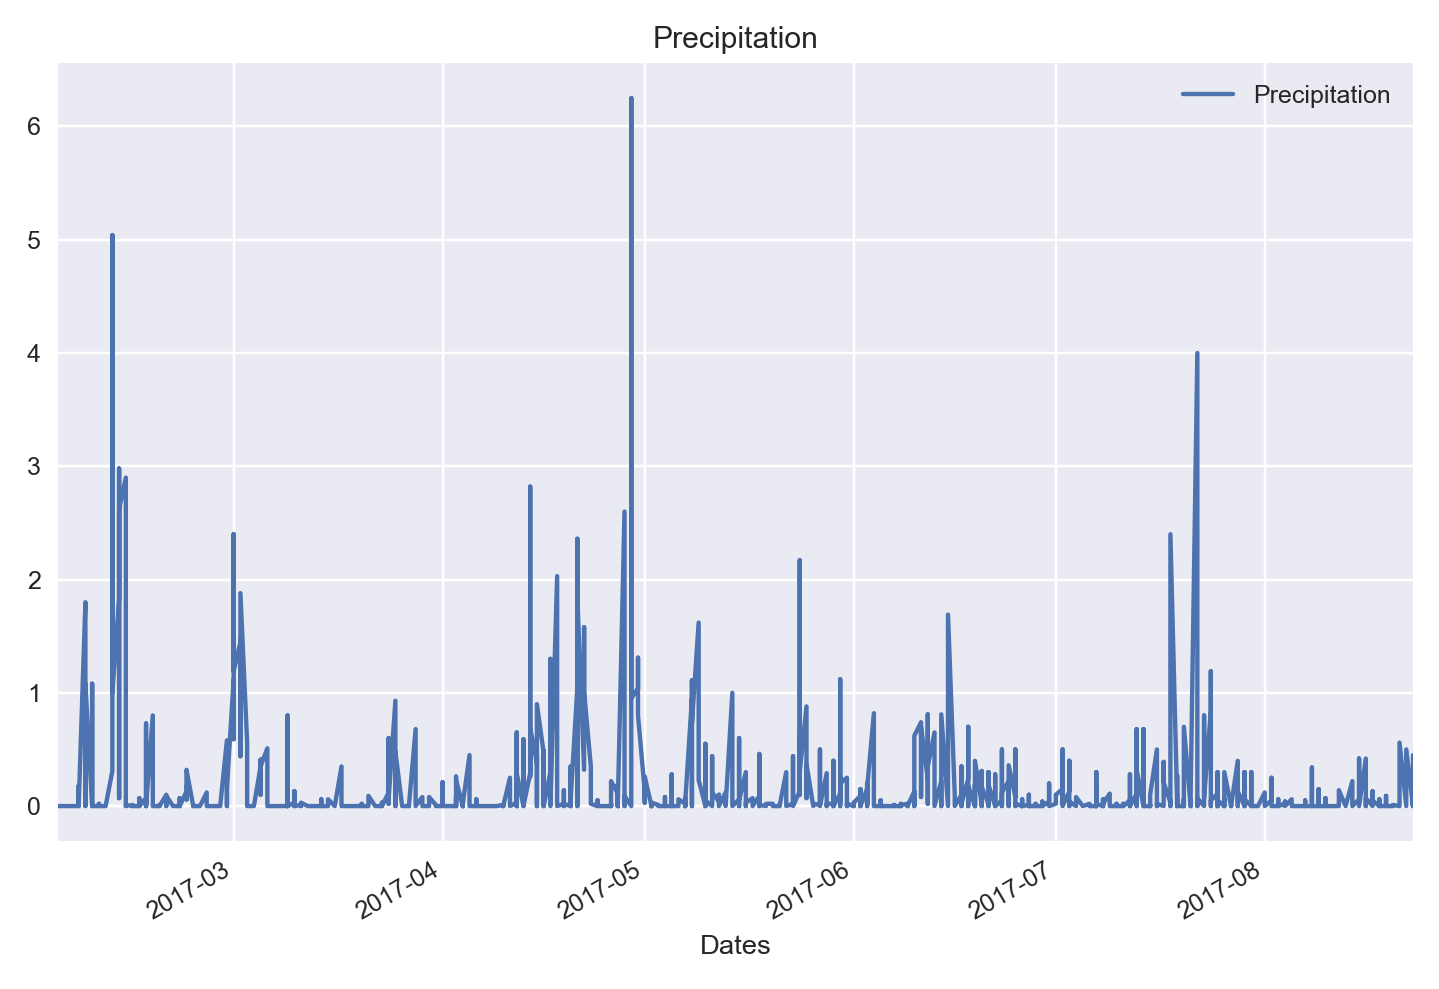

In [26]:
df.plot(title = 'Precipitation')
plt.tight_layout()
plt.show()

<h2>Station Analysis

In [27]:
# Calculate total number of stations

stations_count = session.query(func.count(Stations.name)).all()
stations_count

[(9)]

In [28]:
# Find the most active stations


results = session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
    
results



#results = session.query(Emoji.emoji_char, Emoji.emoji_id, Emoji.score).\
 #   order_by(Emoji.score.desc()).all()

#ordered_results = results.order_by()
#station_activity = session.query(Measurement).count()
#station_activity

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [29]:
station_df = pd.DataFrame(results, columns=['Name', 'Count'])
station_df.set_index('Name', inplace=True,)
station_df.head()

,Count
Name,
USC00519281,2772
USC00519397,2724
USC00513117,2709
USC00519523,2669
USC00516128,2612


In [30]:
# USC00519281 has the highest count  

In [31]:
twelve_month = session.query(Measurement.tobs).\
    filter(Measurement.station=='USC00519281').\
    filter(Measurement.date > one_year_ago).all()
    
twelve_month

[(60.0),
 (70.0),
 (73.0),
 (75.0),
 (64.0),
 (59.0),
 (59.0),
 (62.0),
 (68.0),
 (70.0),
 (73.0),
 (79.0),
 (75.0),
 (65.0),
 (70.0),
 (74.0),
 (70.0),
 (70.0),
 (71.0),
 (71.0),
 (71.0),
 (69.0),
 (61.0),
 (67.0),
 (65.0),
 (72.0),
 (71.0),
 (73.0),
 (72.0),
 (77.0),
 (73.0),
 (67.0),
 (62.0),
 (64.0),
 (67.0),
 (66.0),
 (81.0),
 (69.0),
 (66.0),
 (67.0),
 (69.0),
 (66.0),
 (68.0),
 (65.0),
 (74.0),
 (69.0),
 (72.0),
 (73.0),
 (72.0),
 (71.0),
 (76.0),
 (77.0),
 (76.0),
 (74.0),
 (68.0),
 (73.0),
 (71.0),
 (74.0),
 (75.0),
 (70.0),
 (67.0),
 (71.0),
 (67.0),
 (74.0),
 (77.0),
 (78.0),
 (67.0),
 (70.0),
 (69.0),
 (69.0),
 (74.0),
 (78.0),
 (71.0),
 (67.0),
 (68.0),
 (67.0),
 (76.0),
 (69.0),
 (72.0),
 (76.0),
 (68.0),
 (72.0),
 (74.0),
 (70.0),
 (67.0),
 (72.0),
 (60.0),
 (65.0),
 (75.0),
 (70.0),
 (75.0),
 (70.0),
 (79.0),
 (75.0),
 (70.0),
 (67.0),
 (74.0),
 (70.0),
 (75.0),
 (76.0),
 (77.0),
 (74.0),
 (74.0),
 (74.0),
 (69.0),
 (68.0),
 (76.0),
 (74.0),
 (71.0),
 (71.0),
 (74.0),
 

In [32]:
tobs_df = pd.DataFrame(twelve_month, columns=['tobs'])
tobs_col = tobs_df['tobs']

/Users/EthanCraddock/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


<IPython.core.display.Javascript object>


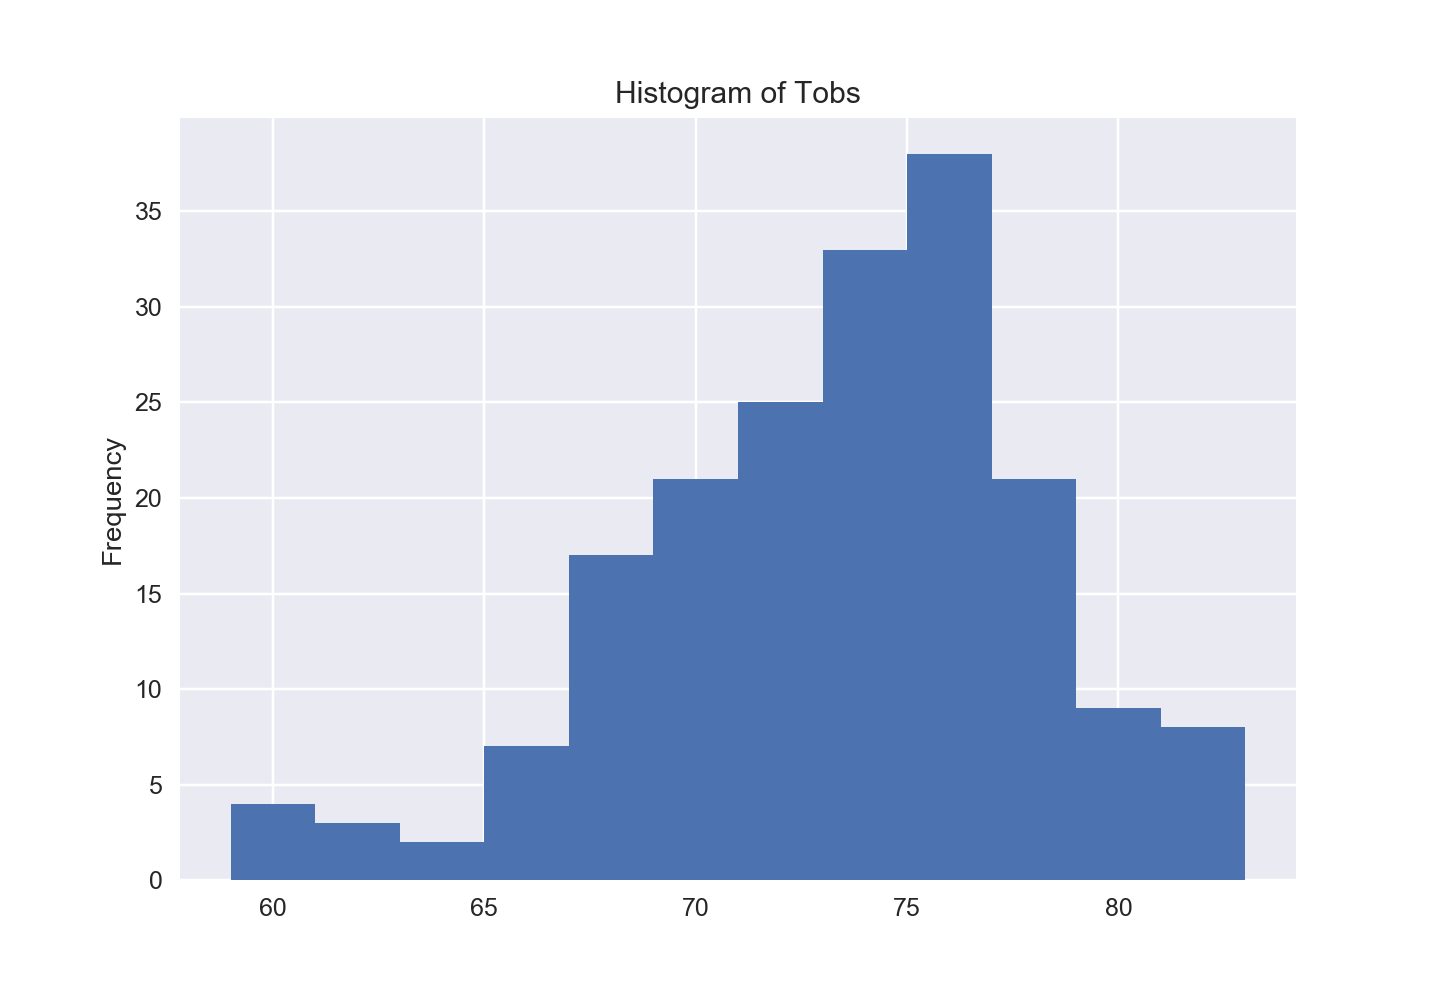

In [33]:
# Bar graph

matplotlib.pyplot.hist(tobs_col, bins=12)


plt.ylabel('Frequency')
plt.legend(loc='upper left')
plt.title('Histogram of Tobs')

plt.show()

<h2> Temperature Analysis

In [34]:
# Write a function called calc_temps that will accept a start date and end date in the 
#format %Y-%m-%d and return the minimum, average, and maximum temperatures for that range of dates.

results = session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
    

start_date = '2016-07-01'
end_date = '2016-12-01'

def calc_temps(start_date, end_date):
    min_temp = session.query(Measurement.station, func.min(Measurement.tobs)).\
    filter(Measurement.date >= start_date, Measurement.date >= end_date).all()
    
    max_temp = session.query(Measurement.station, func.max(Measurement.tobs)).\
    filter(Measurement.date >= start_date, Measurement.date >= end_date).all()
    
    avg_temp = session.query(Measurement.station, func.avg(Measurement.tobs)).\
    filter(Measurement.date >= start_date, Measurement.date >= end_date).all()
    
    
    print('Minimum Temp: ' + str(min_temp))
    print('Maximum Temp: ' + str(max_temp))
    print('Average Temp: ' + str(avg_temp))


    
                           
      

    

In [35]:
calc_temps('2016-07-01', '2016-12-01')

Minimum Temp: [('USC00516128', 58.0)]
Maximum Temp: [('USC00519397', 87.0)]
Average Temp: [('USC00516128', 73.76643706950533)]


In [37]:


x = calc_temps('2016-07-01', '2016-12-01')
print(x)

Minimum Temp: [('USC00516128', 58.0)]
Maximum Temp: [('USC00519397', 87.0)]
Average Temp: [('USC00516128', 73.76643706950533)]
None


In [38]:
#max_min = (max, min)

In [68]:
#plt.bar(avg, yerr=menStd)


In [ ]:
@app.route('/api/v1.0/<start_date>')
@app.route('/api/v1.0/<start_date>/<end_date>')


In [ ]:
start_date = input('What start date would you like to use? YYYY-MM-DD ')
end_date = input('What end date would you like to use? YYYY-MM-DD ')


In [ ]:





if (start_date is not None) and (end_date is None):
    def start_date(start_date):
        min_temp = session.query(Measurement.station, func.min(Measurement.tobs)).\
        filter(Measurement.date >= start_date).all()
    
        max_temp = session.query(Measurement.station, func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).all()
    
        avg_temp = session.query(Measurement.station, func.avg(Measurement.tobs)).\
        filter(Measurement.date >= start_date).all()
    
        values = []
    
        for value in values:
            row = {}
            row['min'] = value.min_temp
            row['max'] = value.max_temp
            row['avg'] = value.avg_temp
            values.append(row)
        
        return jsonify(values)
    
elif (start_date is not None) and (end_date is not None):

    def start_end(start_date, end_date=None):
        min_temp = session.query(Measurement.station, func.min(Measurement.tobs)).\
        filter(Measurement.date >= start_date, Measurement.date >= end_date).all()
    
        max_temp = session.query(Measurement.station, func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date, Measurement.date >= end_date).all()
    
        avg_temp = session.query(Measurement.station, func.avg(Measurement.tobs)).\
        filter(Measurement.date >= start_date, Measurement.date >= end_date).all()
    
        values = []
    
        for value in values:
            row = {}
            row['min'] = value.min_temp
            row['max'] = value.max_temp
            row['avg'] = value.avg_temp
            values.append(row)
        
        return jsonify(values)

    

else:
    print('You need at lease a start date.')
